# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import random
import json
from datetime import datetime


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 630


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
  

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | kayangel
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | kilju
Processing Record 7 of Set 1 | kudahuvadhoo
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | wenling
Processing Record 10 of Set 1 | woolgoolga
Processing Record 11 of Set 1 | qashar
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | jiazi
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | antofagasta
Processing Record 16 of Set 1 | camacupa
Processing Record 17 of Set 1 | bongaree
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | kyzylorda
Processing Record 20 of Set 1 | nova vicosa
Processing Record 21 of Set 1 | sola
Processing Record 22 of Set 1 | ribeira gra

Processing Record 41 of Set 4 | huarmey
Processing Record 42 of Set 4 | colonia
Processing Record 43 of Set 4 | jamestown
Processing Record 44 of Set 4 | zeya
Processing Record 45 of Set 4 | egilsstadir
Processing Record 46 of Set 4 | lamarque
Processing Record 47 of Set 4 | gargalianoi
Processing Record 48 of Set 4 | songea
Processing Record 49 of Set 4 | merizo village
Processing Record 50 of Set 4 | petropavlovsk-kamchatsky
Processing Record 1 of Set 5 | pauini
Processing Record 2 of Set 5 | medicine hat
Processing Record 3 of Set 5 | poway
Processing Record 4 of Set 5 | vorgashor
Processing Record 5 of Set 5 | saipan
Processing Record 6 of Set 5 | quellon
Processing Record 7 of Set 5 | sao jose da coroa grande
Processing Record 8 of Set 5 | kailua-kona
Processing Record 9 of Set 5 | iguala de la independencia
Processing Record 10 of Set 5 | puerto aysen
Processing Record 11 of Set 5 | visakhapatnam
Processing Record 12 of Set 5 | cargados carajos
City not found. Skipping...
Process

Processing Record 31 of Set 8 | verde village
Processing Record 32 of Set 8 | chongwe
Processing Record 33 of Set 8 | amahai
Processing Record 34 of Set 8 | nola
Processing Record 35 of Set 8 | piney green
Processing Record 36 of Set 8 | fomboni
Processing Record 37 of Set 8 | lorengau
Processing Record 38 of Set 8 | kahama
Processing Record 39 of Set 8 | yarmouth
Processing Record 40 of Set 8 | wailua homesteads
Processing Record 41 of Set 8 | wulingyuan
Processing Record 42 of Set 8 | sao paulo de olivenca
Processing Record 43 of Set 8 | ust-nera
Processing Record 44 of Set 8 | san bernardo del viento
Processing Record 45 of Set 8 | castillos
Processing Record 46 of Set 8 | lockwood
Processing Record 47 of Set 8 | tynda
Processing Record 48 of Set 8 | sarikei
Processing Record 49 of Set 8 | bereeda
Processing Record 50 of Set 8 | urangan
Processing Record 1 of Set 9 | namibe
Processing Record 2 of Set 9 | weno
Processing Record 3 of Set 9 | santa elena de uairen
Processing Record 4 o

Processing Record 18 of Set 12 | messaad
Processing Record 19 of Set 12 | sokoto
Processing Record 20 of Set 12 | markala
Processing Record 21 of Set 12 | touros
Processing Record 22 of Set 12 | santa ana
Processing Record 23 of Set 12 | guerrero negro
Processing Record 24 of Set 12 | vila velha
Processing Record 25 of Set 12 | lahij
Processing Record 26 of Set 12 | lerwick
Processing Record 27 of Set 12 | nogales
Processing Record 28 of Set 12 | kayenta
Processing Record 29 of Set 12 | bani
Processing Record 30 of Set 12 | guarapari
Processing Record 31 of Set 12 | caleta de carquin
Processing Record 32 of Set 12 | hardegsen
Processing Record 33 of Set 12 | weligama
Processing Record 34 of Set 12 | cabedelo
Processing Record 35 of Set 12 | bangassou
Processing Record 36 of Set 12 | duba-yurt
Processing Record 37 of Set 12 | galveston
Processing Record 38 of Set 12 | zhongshu
Processing Record 39 of Set 12 | guachochi
City not found. Skipping...
Processing Record 40 of Set 12 | krasnay

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          605
Lat           605
Lng           605
Max Temp      605
Humidity      605
Cloudiness    605
Wind Speed    605
Country       605
Date          605
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,46.53,90,100,13.20,AU,2023-06-29 06:57:54
1,port-aux-francais,-49.3500,70.2167,36.27,95,100,27.25,TF,2023-06-29 06:57:55
2,kayangel,8.0823,134.7173,79.84,85,100,9.75,PW,2023-06-29 06:57:55
3,grytviken,-54.2811,-36.5092,22.39,76,16,8.57,GS,2023-06-29 06:57:55
4,kilju,40.9642,129.3278,76.57,73,100,4.90,KP,2023-06-29 06:57:55


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,46.53,90,100,13.20,AU,2023-06-29 06:57:54
1,port-aux-francais,-49.3500,70.2167,36.27,95,100,27.25,TF,2023-06-29 06:57:55
2,kayangel,8.0823,134.7173,79.84,85,100,9.75,PW,2023-06-29 06:57:55
3,grytviken,-54.2811,-36.5092,22.39,76,16,8.57,GS,2023-06-29 06:57:55
4,kilju,40.9642,129.3278,76.57,73,100,4.90,KP,2023-06-29 06:57:55


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

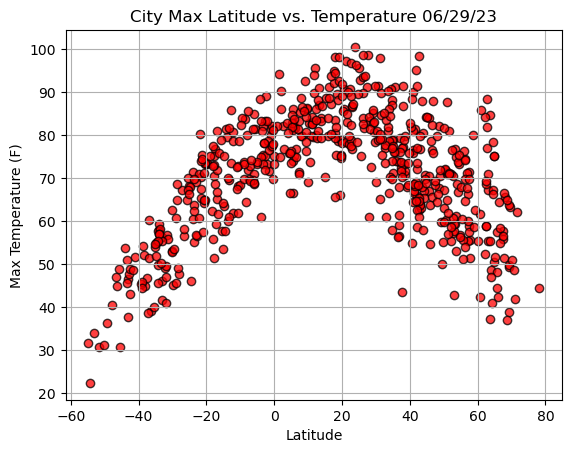

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", facecolors = "red", edgecolor = "black", alpha = 0.75)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

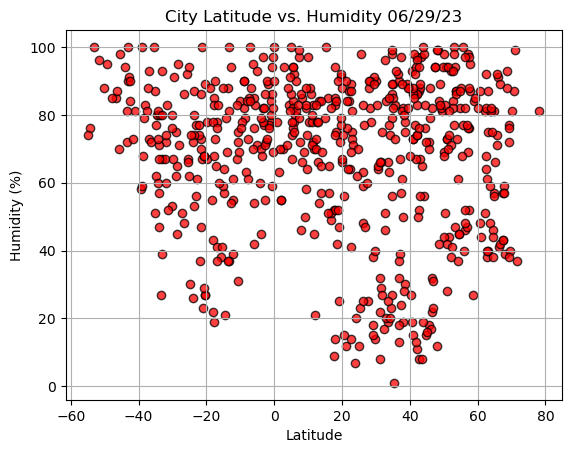

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", facecolors = "red", edgecolor = "black", alpha = 0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

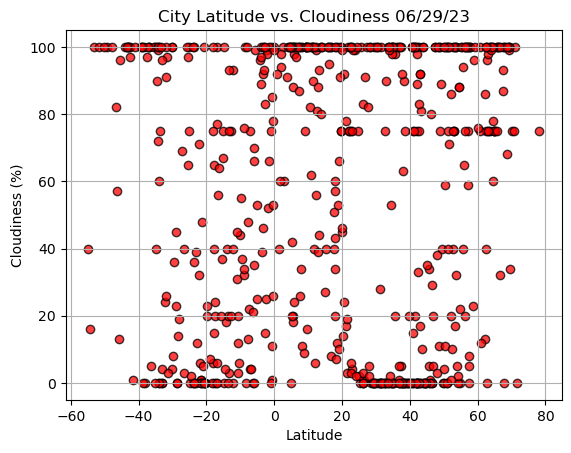

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", facecolors = "red", edgecolor = "black", alpha = 0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

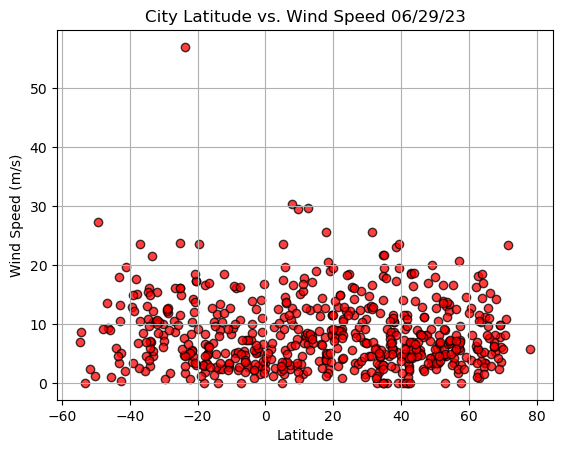

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", facecolors = "red", edgecolor = "black", alpha = 0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    plt.annotate(line_equation, text_coordinates, fontsize = 20, color="black")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f'r:{r_value:.4f}')

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kayangel,8.0823,134.7173,79.84,85,100,9.75,PW,2023-06-29 06:57:55
4,kilju,40.9642,129.3278,76.57,73,100,4.90,KP,2023-06-29 06:57:55
5,kudahuvadhoo,2.6708,72.8944,82.09,70,100,9.51,MV,2023-06-29 06:57:55
6,bilibino,68.0546,166.4372,65.66,39,100,14.32,RU,2023-06-29 06:57:56
7,wenling,28.3669,121.3600,83.17,82,100,15.55,CN,2023-06-29 06:57:56


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,46.53,90,100,13.20,AU,2023-06-29 06:57:54
1,port-aux-francais,-49.3500,70.2167,36.27,95,100,27.25,TF,2023-06-29 06:57:55
3,grytviken,-54.2811,-36.5092,22.39,76,16,8.57,GS,2023-06-29 06:57:55
8,woolgoolga,-30.1106,153.2007,62.47,53,4,10.00,AU,2023-06-29 06:57:56
12,east london,-33.0153,27.9116,56.34,67,0,10.36,ZA,2023-06-29 06:57:57


###  Temperature vs. Latitude Linear Regression Plot

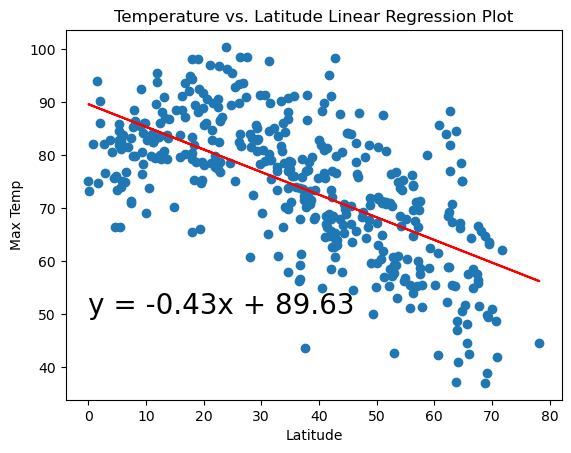

r:-0.6382


In [25]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Temperature vs. Latitude Linear Regression Plot', 'Max Temp', (0,50))

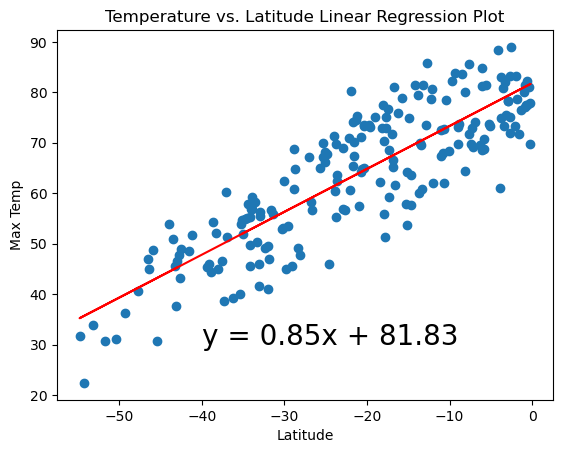

r:0.8571


In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Temperature vs. Latitude Linear Regression Plot', 'Max Temp', (-40,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

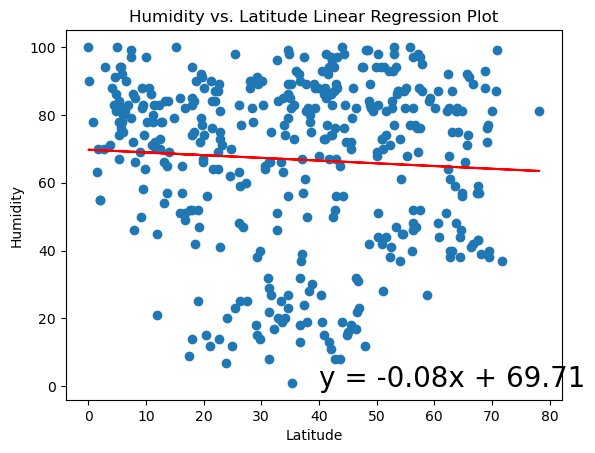

r:-0.0622


In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity vs. Latitude Linear Regression Plot', 'Humidity', (40,0))

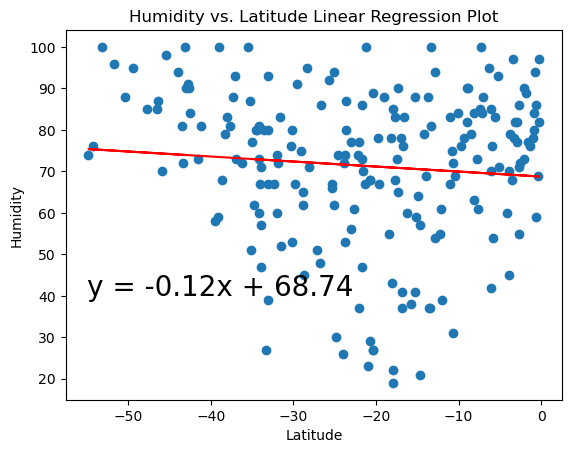

r:-0.0902


In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity vs. Latitude Linear Regression Plot', 'Humidity', (-55,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

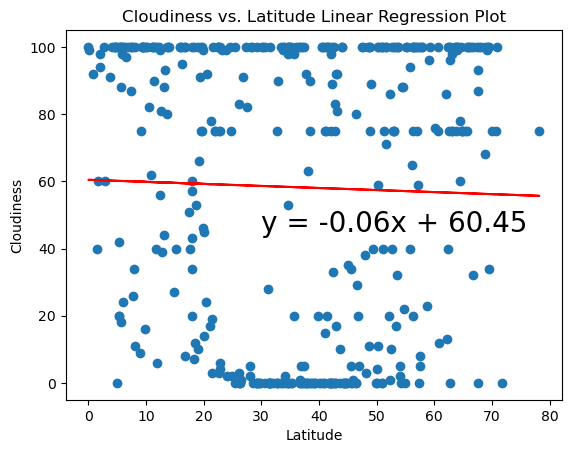

r:-0.0277


In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness vs. Latitude Linear Regression Plot', 'Cloudiness', (30,45))

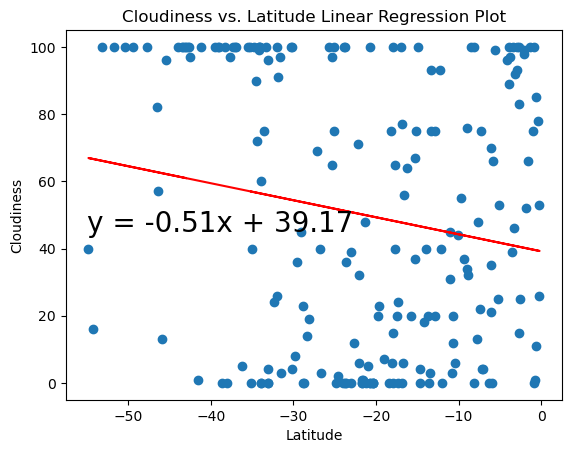

r:-0.1740


In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness vs. Latitude Linear Regression Plot', 'Cloudiness', (-55,45))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

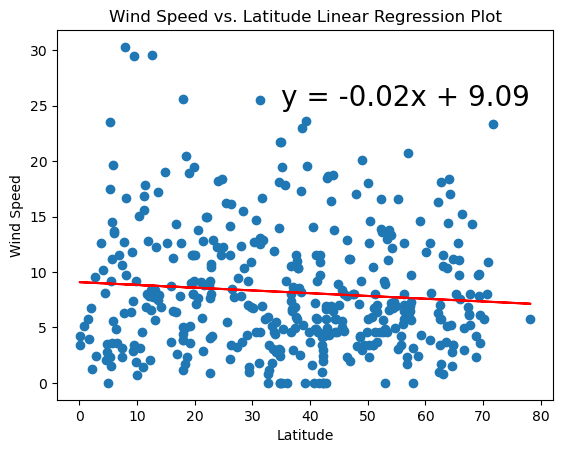

r:-0.0846


In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed vs. Latitude Linear Regression Plot', 'Wind Speed', (35,25))

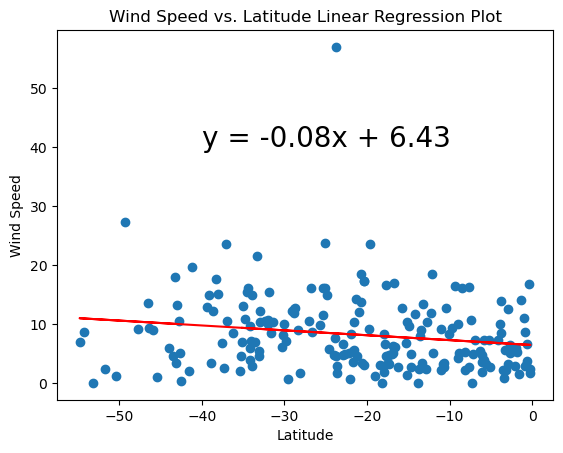

r:-0.1790


In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed vs. Latitude Linear Regression Plot', 'Wind Speed', (-40,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE